In [68]:
library(dplyr)
library(ggplot2)

df <- read.csv(paste("C:/Users/saavedrak/Desktop/",
                     "USP_587_data/OHAS_v2/household.csv", sep=""))

In [69]:
print("Table 1. Summary Statistics of Selected Columns")

df %>%
    select(resty, income, hhveh, htrips) %>%
    summary()

[1] "Table 1. Summary Statistics of Selected Columns"


     resty           income          hhveh           htrips      
 Min.   :1.000   Min.   : 1.00   Min.   :0.000   Min.   : 0.000  
 1st Qu.:1.000   1st Qu.: 4.00   1st Qu.:1.000   1st Qu.: 4.000  
 Median :1.000   Median : 5.00   Median :2.000   Median : 8.000  
 Mean   :1.402   Mean   :11.32   Mean   :1.948   Mean   : 9.815  
 3rd Qu.:1.000   3rd Qu.: 7.00   3rd Qu.:2.000   3rd Qu.:14.000  
 Max.   :9.000   Max.   :99.00   Max.   :8.000   Max.   :81.000  

In [70]:
print("Table 2. Household Trips by Income Group")
inc.group <- group_by(df, income)  %>%
    filter(income != 99)
inc.group.sum <- summarize(inc.group, count=n(), htrips_avg=mean(htrips))
inc.group.sum

[1] "Table 2. Household Trips by Income Group"


income,count,htrips_avg
1,314,6.359873
2,485,6.837113
3,479,6.828810
4,743,8.079408
5,1321,9.677517
6,1134,11.241623
7,1013,12.244817
8,530,12.622642


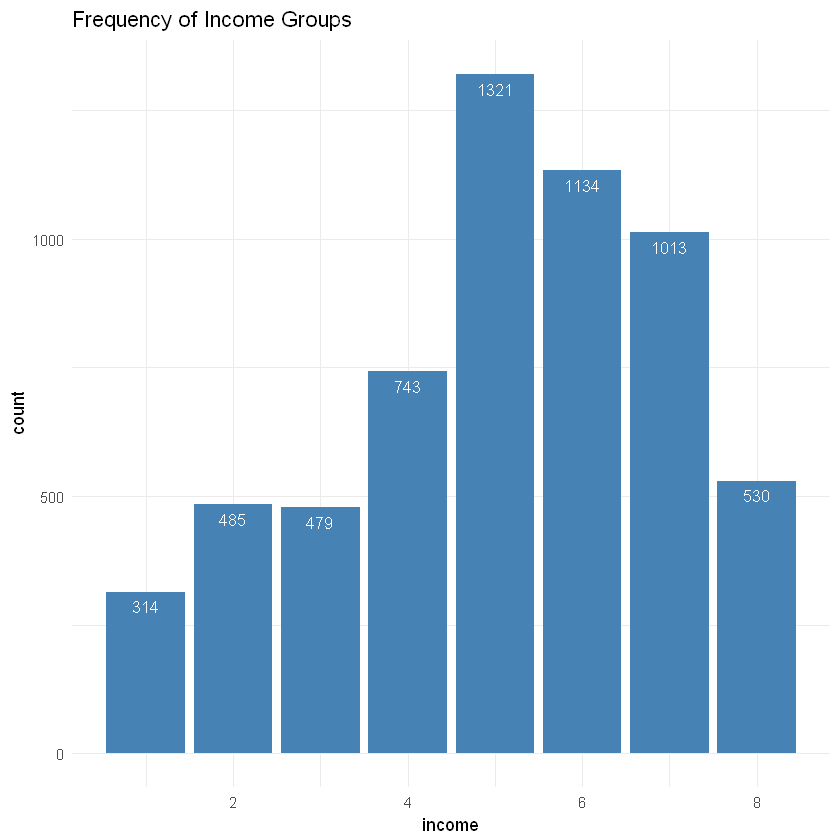

In [85]:
inc.group.sum %>% 
    ggplot(aes(x=income, y=count)) + 
    geom_bar(stat="identity", fill="steelblue") +
    geom_text(aes(label=count), vjust=1.6, color="white", size=3.5) +
    labs(title="Frequency of Income Groups") +
    theme_minimal()